In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Cargar datos
df = pd.read_excel('data/edades.xlsx')

# Normalizar etapas de edad (algunas tienen texto adicional)
def normalizar_etapa(etapa):
    if 'Niñas/os' in etapa:
        return 'Niñas/os (0 a 11 años)'
    elif 'Adolescentes' in etapa:
        return 'Adolescentes (12 a 17 años)'
    elif 'Jóvenes' in etapa:
        return 'Jóvenes (18 a 29 años)'
    elif 'Adultas/os mayores' in etapa:
        return 'Adultas/os mayores (65 años o más)'
    elif 'Adultas/os' in etapa:
        return 'Adultas/os (30 a 64 años)'
    return etapa

df['Etapa Edad'] = df['Etapa Edad'].apply(normalizar_etapa)

# Orden de etapas de edad (de menor a mayor)
orden_etapas = [
    'Niñas/os (0 a 11 años)',
    'Adolescentes (12 a 17 años)',
    'Jóvenes (18 a 29 años)',
    'Adultas/os (30 a 64 años)',
    'Adultas/os mayores (65 años o más)'
]

# Etiquetas cortas para el gráfico
etiquetas_cortas = [
    '0 a 11',
    '12 a 17',
    '18 a 29',
    '30 a 64',
    '65 y más'
]

# Colores y estilos por año
colores = {2001: '#1f77b4', 2010: '#f5b800', 2022: '#d62728'}
colores_mujer = {2001: '#2ca02c', 2010: '#9467bd', 2022: '#ff7f0e'}
estilos = {2001: '-', 2010: '-.', 2022: '--'}

# Años disponibles
anios = [2001, 2010, 2022]

# Función para calcular porcentajes
def calcular_porcentajes(df_area):
    """Calcular porcentajes de población por año, género y etapa de edad"""
    result = {}
    for anio in anios:
        df_anio = df_area[df_area['Año'] == anio]
        total = df_anio['pob_tT'].sum()
        result[anio] = {}
        for genero in ['Hombre', 'Mujer']:
            df_genero = df_anio[df_anio['Genero'] == genero]
            porcentajes = []
            for etapa in orden_etapas:
                pob = df_genero[df_genero['Etapa Edad'] == etapa]['pob_tT'].values
                if len(pob) > 0:
                    porcentajes.append((pob[0] / total) * 100)
                else:
                    porcentajes.append(0)
            result[anio][genero] = porcentajes
    return result

# Verificar datos
print(df.groupby(['Area', 'Año', 'Genero']).size())

Area    Año   Genero
Rural   2001  Hombre    5
              Mujer     5
        2010  Hombre    5
              Mujer     5
        2022  Hombre    5
              Mujer     5
Urbano  2001  Hombre    5
              Mujer     5
        2010  Hombre    5
              Mujer     5
        2022  Hombre    5
              Mujer     5
dtype: int64


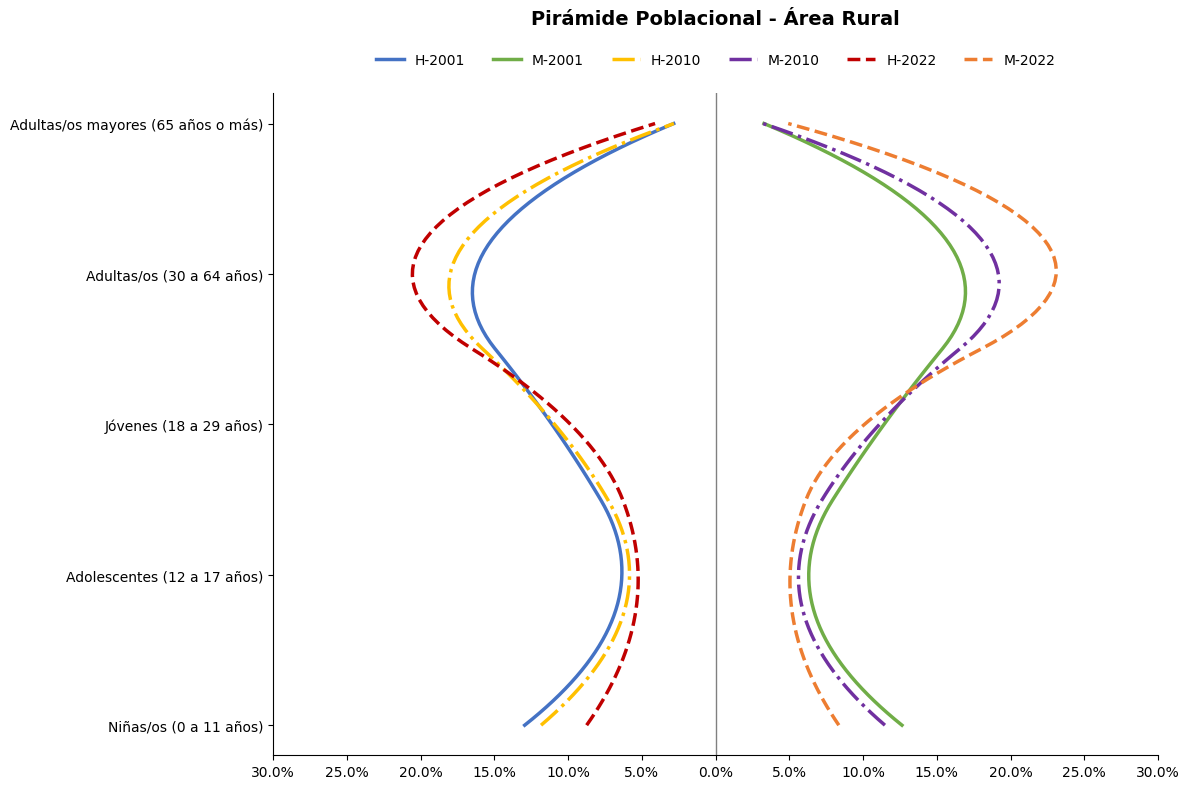

In [2]:
# ==========================================
# GRÁFICO 1: PIRÁMIDE POBLACIONAL - ÁREA RURAL
# ==========================================

df_rural = df[df['Area'] == 'Rural']
datos_rural = calcular_porcentajes(df_rural)

fig, ax = plt.subplots(figsize=(12, 8))

# Posiciones Y para las etapas de edad
y_pos = np.arange(len(orden_etapas))

# Colores como en la imagen de referencia
colores_hombre = {2001: '#4472C4', 2010: '#FFC000', 2022: '#C00000'}
colores_mujer = {2001: '#70AD47', 2010: '#7030A0', 2022: '#ED7D31'}
estilos_linea = {2001: '-', 2010: '-.', 2022: '--'}

# Dibujar líneas para cada año
for anio in anios:
    # Hombres (izquierda - valores negativos)
    hombres = [-p for p in datos_rural[anio]['Hombre']]
    
    # Crear interpolación suave para hombres (k=2 para menos ondulación)
    spline_hombres = make_interp_spline(y_pos, hombres, k=2)
    y_smooth = np.linspace(y_pos.min(), y_pos.max(), 100)
    hombres_smooth = spline_hombres(y_smooth)
    
    ax.plot(hombres_smooth, y_smooth, color=colores_hombre[anio], linestyle=estilos_linea[anio], 
            linewidth=2.5, label=f'H-{anio}')
    
    # Mujeres (derecha - valores positivos)
    mujeres = datos_rural[anio]['Mujer']
    
    # Crear interpolación suave para mujeres (k=2 para menos ondulación)
    spline_mujeres = make_interp_spline(y_pos, mujeres, k=2)
    mujeres_smooth = spline_mujeres(y_smooth)
    
    ax.plot(mujeres_smooth, y_smooth, color=colores_mujer[anio], linestyle=estilos_linea[anio], 
            linewidth=2.5, label=f'M-{anio}')

# Línea central vertical
ax.axvline(x=0, color='gray', linewidth=1)

# Configurar ejes
ax.set_yticks(y_pos)
ax.set_yticklabels(orden_etapas)

# Configurar límites del eje X simétricos
max_val = 30  # Fijo para mejor visualización
ax.set_xlim(-max_val, max_val)

# Configurar etiquetas del eje X
ax.set_xticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['30.0%', '25.0%', '20.0%', '15.0%', '10.0%', '5.0%', '0.0%', '5.0%', '10.0%', '15.0%', '20.0%', '25.0%', '30.0%'])

# Quitar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda en la parte superior
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=6, frameon=False, fontsize=10)

# Título
ax.set_title('Pirámide Poblacional - Área Rural', fontsize=14, fontweight='bold', pad=50)

# Fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

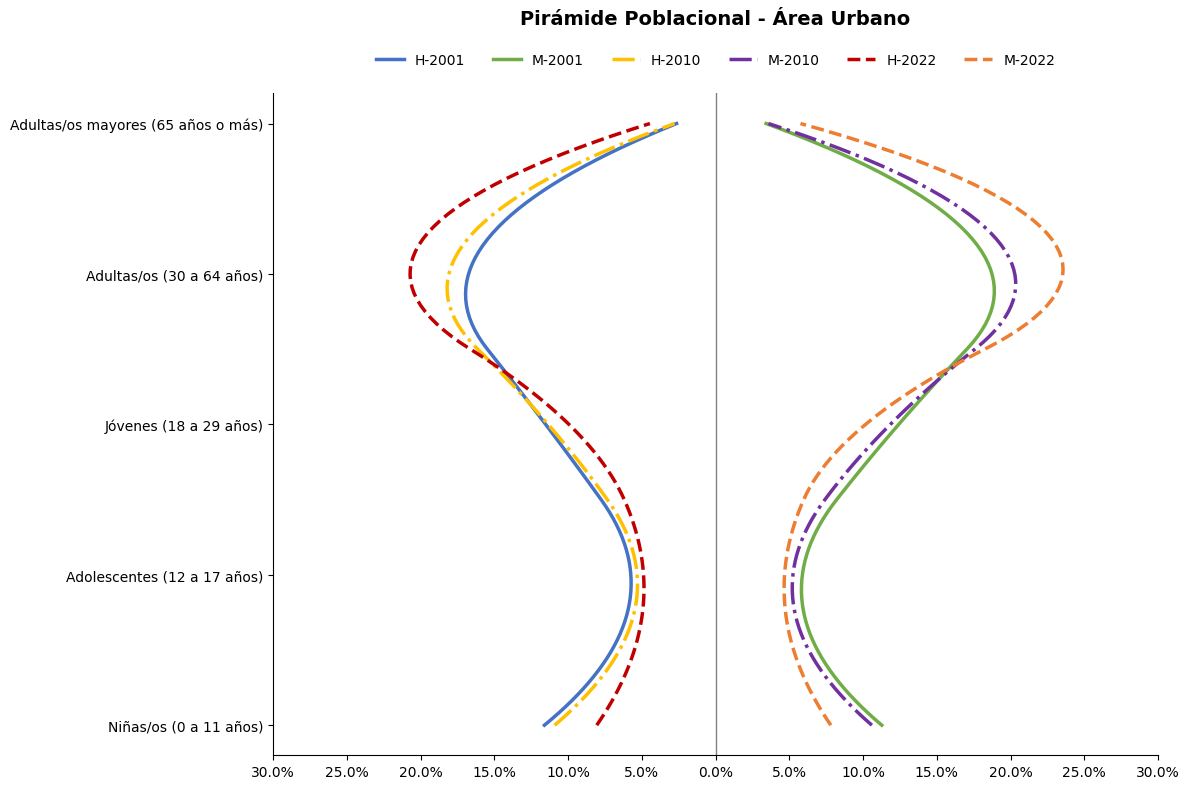

In [3]:
# ==========================================
# GRÁFICO 2: PIRÁMIDE POBLACIONAL - ÁREA URBANO
# ==========================================

df_urbano = df[df['Area'] == 'Urbano']
datos_urbano = calcular_porcentajes(df_urbano)

fig, ax = plt.subplots(figsize=(12, 8))

# Posiciones Y para las etapas de edad
y_pos = np.arange(len(orden_etapas))

# Colores como en la imagen de referencia
colores_hombre = {2001: '#4472C4', 2010: '#FFC000', 2022: '#C00000'}
colores_mujer = {2001: '#70AD47', 2010: '#7030A0', 2022: '#ED7D31'}
estilos_linea = {2001: '-', 2010: '-.', 2022: '--'}

# Dibujar líneas para cada año
for anio in anios:
    # Hombres (izquierda - valores negativos)
    hombres = [-p for p in datos_urbano[anio]['Hombre']]
    
    # Crear interpolación suave para hombres (k=2 para menos ondulación)
    spline_hombres = make_interp_spline(y_pos, hombres, k=2)
    y_smooth = np.linspace(y_pos.min(), y_pos.max(), 100)
    hombres_smooth = spline_hombres(y_smooth)
    
    ax.plot(hombres_smooth, y_smooth, color=colores_hombre[anio], linestyle=estilos_linea[anio], 
            linewidth=2.5, label=f'H-{anio}')
    
    # Mujeres (derecha - valores positivos)
    mujeres = datos_urbano[anio]['Mujer']
    
    # Crear interpolación suave para mujeres (k=2 para menos ondulación)
    spline_mujeres = make_interp_spline(y_pos, mujeres, k=2)
    mujeres_smooth = spline_mujeres(y_smooth)
    
    ax.plot(mujeres_smooth, y_smooth, color=colores_mujer[anio], linestyle=estilos_linea[anio], 
            linewidth=2.5, label=f'M-{anio}')

# Línea central vertical
ax.axvline(x=0, color='gray', linewidth=1)

# Configurar ejes
ax.set_yticks(y_pos)
ax.set_yticklabels(orden_etapas)

# Configurar límites del eje X simétricos
max_val = 30  # Fijo para mejor visualización
ax.set_xlim(-max_val, max_val)

# Configurar etiquetas del eje X
ax.set_xticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['30.0%', '25.0%', '20.0%', '15.0%', '10.0%', '5.0%', '0.0%', '5.0%', '10.0%', '15.0%', '20.0%', '25.0%', '30.0%'])

# Quitar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda en la parte superior
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=6, frameon=False, fontsize=10)

# Título
ax.set_title('Pirámide Poblacional - Área Urbano', fontsize=14, fontweight='bold', pad=50)

# Fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

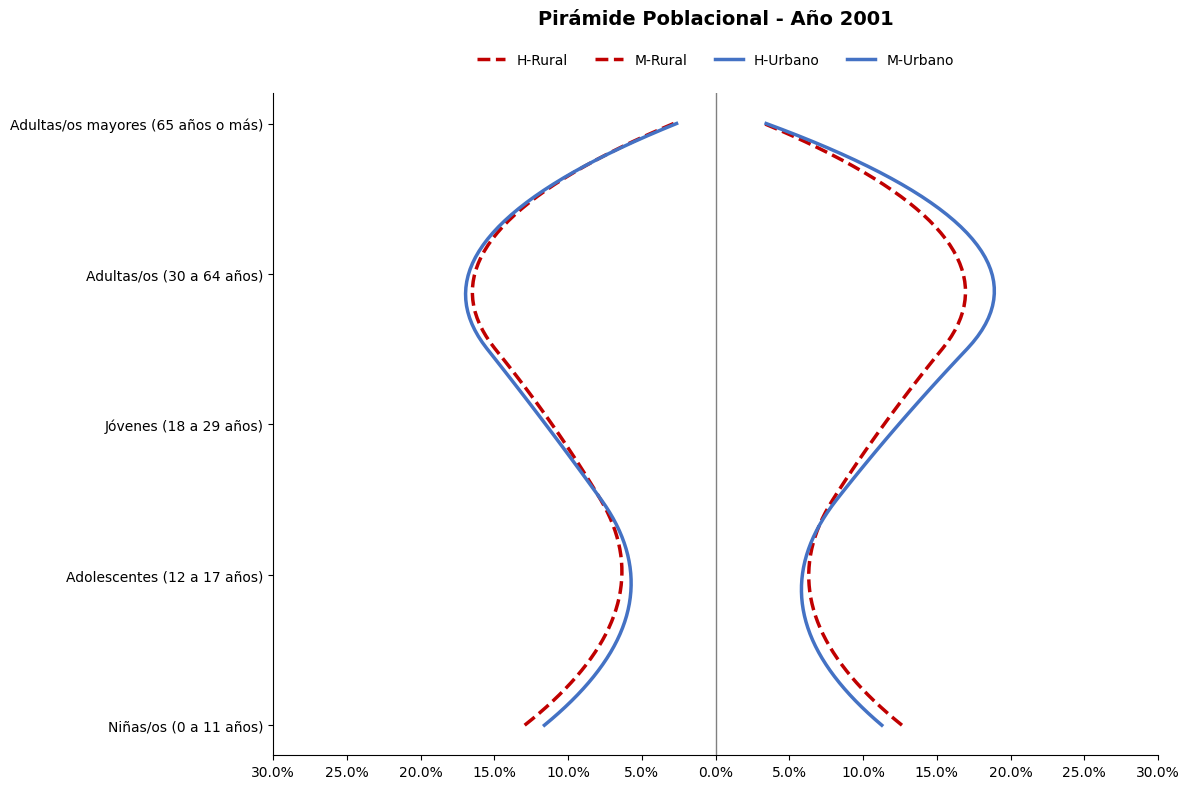

In [4]:
# ==========================================
# GRÁFICO 3: PIRÁMIDE POBLACIONAL - AÑO 2001
# ==========================================

fig, ax = plt.subplots(figsize=(12, 8))

# Posiciones Y para las etapas de edad
y_pos = np.arange(len(orden_etapas))

# Colores por área
colores_area = {'Rural': '#C00000', 'Urbano': '#4472C4'}
estilos_area = {'Rural': '--', 'Urbano': '-'}

anio = 2001

# Dibujar líneas para cada área
for area in ['Rural', 'Urbano']:
    df_area = df[df['Area'] == area]
    datos_area = calcular_porcentajes(df_area)
    
    # Hombres (izquierda - valores negativos)
    hombres = [-p for p in datos_area[anio]['Hombre']]
    
    # Crear interpolación suave para hombres
    spline_hombres = make_interp_spline(y_pos, hombres, k=2)
    y_smooth = np.linspace(y_pos.min(), y_pos.max(), 100)
    hombres_smooth = spline_hombres(y_smooth)
    
    ax.plot(hombres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'H-{area}')
    
    # Mujeres (derecha - valores positivos)
    mujeres = datos_area[anio]['Mujer']
    
    # Crear interpolación suave para mujeres
    spline_mujeres = make_interp_spline(y_pos, mujeres, k=2)
    mujeres_smooth = spline_mujeres(y_smooth)
    
    ax.plot(mujeres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'M-{area}')

# Línea central vertical
ax.axvline(x=0, color='gray', linewidth=1)

# Configurar ejes
ax.set_yticks(y_pos)
ax.set_yticklabels(orden_etapas)

# Configurar límites del eje X simétricos
max_val = 30
ax.set_xlim(-max_val, max_val)

# Configurar etiquetas del eje X
ax.set_xticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['30.0%', '25.0%', '20.0%', '15.0%', '10.0%', '5.0%', '0.0%', '5.0%', '10.0%', '15.0%', '20.0%', '25.0%', '30.0%'])

# Quitar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda en la parte superior
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, frameon=False, fontsize=10)

# Título
ax.set_title(f'Pirámide Poblacional - Año {anio}', fontsize=14, fontweight='bold', pad=50)

# Fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

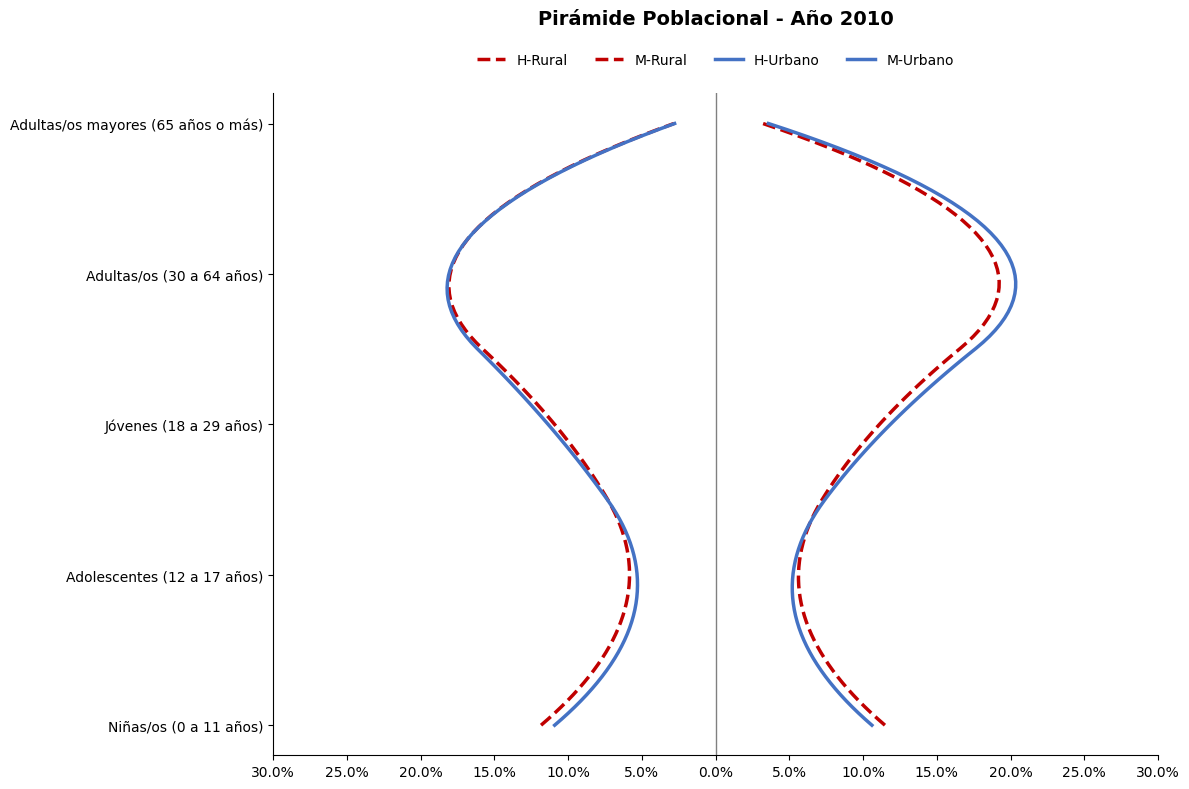

In [5]:
# ==========================================
# GRÁFICO 4: PIRÁMIDE POBLACIONAL - AÑO 2010
# ==========================================

fig, ax = plt.subplots(figsize=(12, 8))

# Posiciones Y para las etapas de edad
y_pos = np.arange(len(orden_etapas))

# Colores por área
colores_area = {'Rural': '#C00000', 'Urbano': '#4472C4'}
estilos_area = {'Rural': '--', 'Urbano': '-'}

anio = 2010

# Dibujar líneas para cada área
for area in ['Rural', 'Urbano']:
    df_area = df[df['Area'] == area]
    datos_area = calcular_porcentajes(df_area)
    
    # Hombres (izquierda - valores negativos)
    hombres = [-p for p in datos_area[anio]['Hombre']]
    
    # Crear interpolación suave para hombres
    spline_hombres = make_interp_spline(y_pos, hombres, k=2)
    y_smooth = np.linspace(y_pos.min(), y_pos.max(), 100)
    hombres_smooth = spline_hombres(y_smooth)
    
    ax.plot(hombres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'H-{area}')
    
    # Mujeres (derecha - valores positivos)
    mujeres = datos_area[anio]['Mujer']
    
    # Crear interpolación suave para mujeres
    spline_mujeres = make_interp_spline(y_pos, mujeres, k=2)
    mujeres_smooth = spline_mujeres(y_smooth)
    
    ax.plot(mujeres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'M-{area}')

# Línea central vertical
ax.axvline(x=0, color='gray', linewidth=1)

# Configurar ejes
ax.set_yticks(y_pos)
ax.set_yticklabels(orden_etapas)

# Configurar límites del eje X simétricos
max_val = 30
ax.set_xlim(-max_val, max_val)

# Configurar etiquetas del eje X
ax.set_xticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['30.0%', '25.0%', '20.0%', '15.0%', '10.0%', '5.0%', '0.0%', '5.0%', '10.0%', '15.0%', '20.0%', '25.0%', '30.0%'])

# Quitar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda en la parte superior
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, frameon=False, fontsize=10)

# Título
ax.set_title(f'Pirámide Poblacional - Año {anio}', fontsize=14, fontweight='bold', pad=50)

# Fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

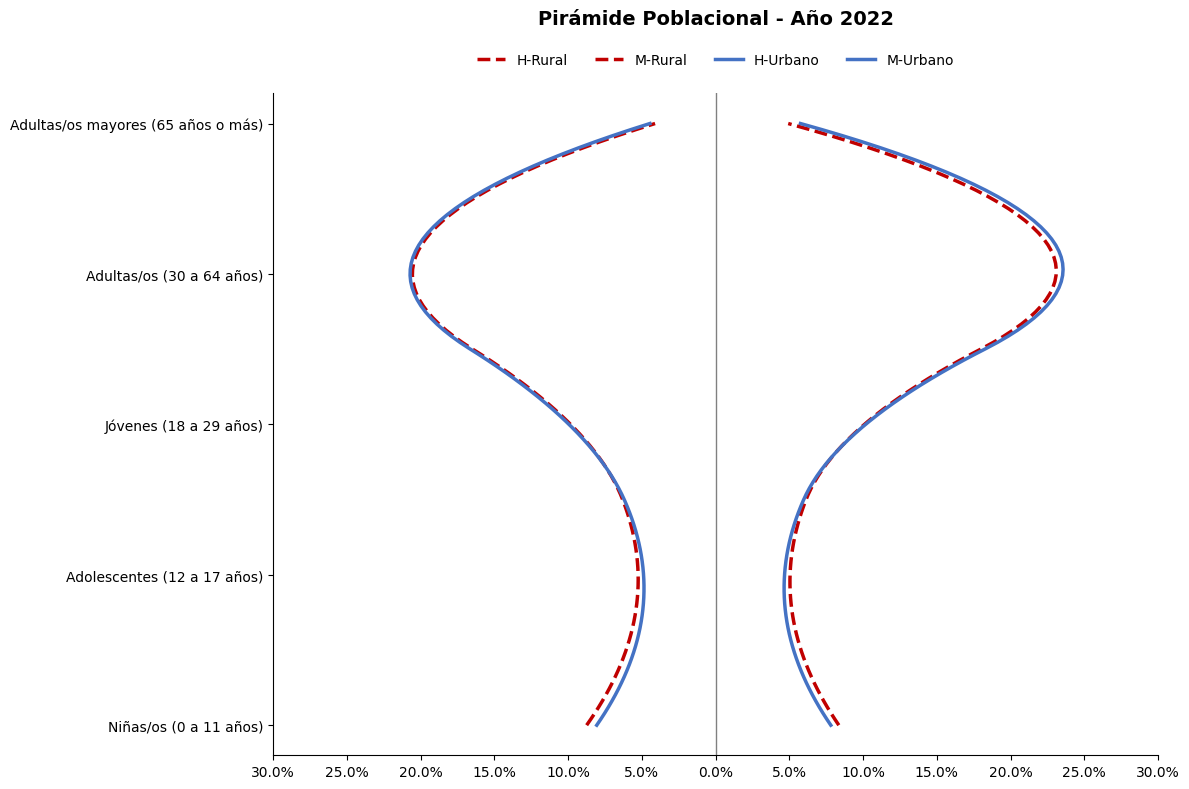

In [6]:
# ==========================================
# GRÁFICO 5: PIRÁMIDE POBLACIONAL - AÑO 2022
# ==========================================

fig, ax = plt.subplots(figsize=(12, 8))

# Posiciones Y para las etapas de edad
y_pos = np.arange(len(orden_etapas))

# Colores por área
colores_area = {'Rural': '#C00000', 'Urbano': '#4472C4'}
estilos_area = {'Rural': '--', 'Urbano': '-'}

anio = 2022

# Dibujar líneas para cada área
for area in ['Rural', 'Urbano']:
    df_area = df[df['Area'] == area]
    datos_area = calcular_porcentajes(df_area)
    
    # Hombres (izquierda - valores negativos)
    hombres = [-p for p in datos_area[anio]['Hombre']]
    
    # Crear interpolación suave para hombres
    spline_hombres = make_interp_spline(y_pos, hombres, k=2)
    y_smooth = np.linspace(y_pos.min(), y_pos.max(), 100)
    hombres_smooth = spline_hombres(y_smooth)
    
    ax.plot(hombres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'H-{area}')
    
    # Mujeres (derecha - valores positivos)
    mujeres = datos_area[anio]['Mujer']
    
    # Crear interpolación suave para mujeres
    spline_mujeres = make_interp_spline(y_pos, mujeres, k=2)
    mujeres_smooth = spline_mujeres(y_smooth)
    
    ax.plot(mujeres_smooth, y_smooth, color=colores_area[area], linestyle=estilos_area[area], 
            linewidth=2.5, label=f'M-{area}')

# Línea central vertical
ax.axvline(x=0, color='gray', linewidth=1)

# Configurar ejes
ax.set_yticks(y_pos)
ax.set_yticklabels(orden_etapas)

# Configurar límites del eje X simétricos
max_val = 30
ax.set_xlim(-max_val, max_val)

# Configurar etiquetas del eje X
ax.set_xticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['30.0%', '25.0%', '20.0%', '15.0%', '10.0%', '5.0%', '0.0%', '5.0%', '10.0%', '15.0%', '20.0%', '25.0%', '30.0%'])

# Quitar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda en la parte superior
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, frameon=False, fontsize=10)

# Título
ax.set_title(f'Pirámide Poblacional - Año {anio}', fontsize=14, fontweight='bold', pad=50)

# Fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.tight_layout()
plt.show()